Task : Predict customer churn

# Data Preprocessing

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [91]:
csvpath = "../csv/Churn_Modelling.csv"

In [92]:
dataset = pd.read_csv(csvpath)

In [93]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [94]:
dataset["CustomerId"].nunique()#All customers are unique

10000

In [95]:
dataset.shape

(10000, 14)

### Missing Values

In [96]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [97]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [98]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [99]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [100]:
dataset["Geography"].unique()#Nominal

array(['France', 'Spain', 'Germany'], dtype=object)

In [101]:
dataset["Gender"].unique()#Nominal

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [102]:
dataset = pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [103]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [104]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

#### Split the Independent and Dependent variables

In [105]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [106]:
#Independent variables
x = dataset.drop("Exited",axis = 1)

In [107]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [108]:
type(x)

pandas.core.frame.DataFrame

In [109]:
x.shape

(10000, 11)

In [110]:
y = dataset["Exited"]

In [111]:
y.shape

(10000,)

In [112]:
x.shape

(10000, 11)

### Split the data into train and test set

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
#20% --Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [115]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [116]:
x_train.shape

(8000, 11)

In [117]:
x_test.shape

(2000, 11)

In [118]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


### Scaling or Standardization or Normalization

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc = StandardScaler()#Creatin the object

In [121]:
#fit -- To apply the formula
#transform -- 
x_train = sc.fit_transform(x_train)

In [122]:
x_test = sc.transform(x_test)

In [123]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [124]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

 Building The NN Architecture

In [125]:
import tensorflow

In [126]:
tensorflow.__version__

'2.10.0'

In [182]:
#Sequential -- init the Neural network model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

Init the Neural Network model

In [183]:
nn_model = Sequential()

In [184]:
x_train.shape

(8000, 11)

Add input Layer

In [185]:
x_train.shape[1]

11

In [186]:
inp_layer = Input(shape = (x_train.shape[1],) )

In [187]:
nn_model.add(inp_layer)

Add Hidden Layer

In [188]:
#units -- -- no of nerons in hidden Layer
#kernel --- weights-- kerenal_initializer -- strategy to init the weight
#activation -- the activation function for this Layer
hidden_layer = Dense(units = 6, kernel_initializer = "random_uniform", activation = "relu", bias_initializer = "random_uniform")

In [189]:
nn_model.add(hidden_layer)

Add Output layer

In [190]:
#units -- no of neurons in output layer
#kernel -- weights -- kernel_initialzer --- strategy to init the weights
#activation -- the activation function for  this layer 
output_layer = Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid", bias_initializer = "random_uniform")

In [191]:
nn_model.add(output_layer)

In [192]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [193]:
from tensorflow.keras.utils import plot_model

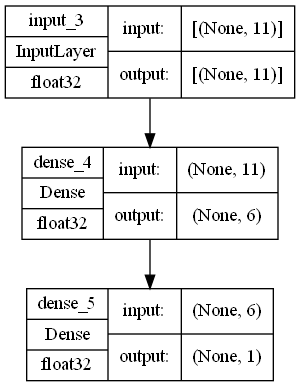

In [194]:
plot_model(nn_model, show_shapes = True, show_dtype = True)

In [195]:
np.__version__

'1.23.5'

 Compile the model

In [196]:
#Compile
#mention the strategies for back- propagation
#loss -- loss calculating statergy

nn_model.compile(loss = "mse", optimizer = "sgd", metrics = ["accuracy"])

In [197]:
from tensorflow.keras.optimizers import SDG, Adam

ImportError: cannot import name 'SDG' from 'tensorflow.keras.optimizers' (C:\Users\sandh\anaconda3\lib\site-packages\keras\api\_v2\keras\optimizers\__init__.py)

Train The model

In [142]:
len(x_train)/32

250.0

In [143]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [144]:
#epochs no of iterations
#batch_size -- for how may obersvation we want to update the weight -- batch processing 
history = nn_model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2249 - accuracy: 0.7945
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1828 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1751 - accuracy: 0.7945
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.1707 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.1680 - accuracy: 0.7945
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.7945
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.1652 - accuracy: 0.7945
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.7945
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.7945

In [145]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [146]:
loss_data = history.history["loss"]

In [147]:
loss_data

[0.22490167617797852,
 0.1971273273229599,
 0.18281137943267822,
 0.17509688436985016,
 0.17068862915039062,
 0.16802698373794556,
 0.1663486212491989,
 0.16523465514183044,
 0.16446398198604584,
 0.16390980780124664,
 0.16348937153816223,
 0.16315411031246185,
 0.16286960244178772,
 0.16261352598667145,
 0.16237249970436096,
 0.16213370859622955,
 0.16188852488994598,
 0.16163180768489838,
 0.1613568216562271,
 0.16106124222278595,
 0.16074027121067047,
 0.16039159893989563,
 0.16001412272453308,
 0.1596052050590515,
 0.1591644138097763,
 0.1586899757385254,
 0.15818195044994354,
 0.15764285624027252,
 0.15706990659236908,
 0.15646612644195557,
 0.15583115816116333,
 0.15516573190689087,
 0.15446984767913818,
 0.15374232828617096,
 0.15298603475093842,
 0.15220050513744354,
 0.15138418972492218,
 0.15053912997245789,
 0.1496639996767044,
 0.14875982701778412,
 0.14782515168190002,
 0.14686410129070282,
 0.14587944746017456,
 0.14487916231155396,
 0.1438761204481125,
 0.142870545387268

In [148]:
len(loss_data)

50

In [149]:
epochs = range(1, len(loss_data)+1)

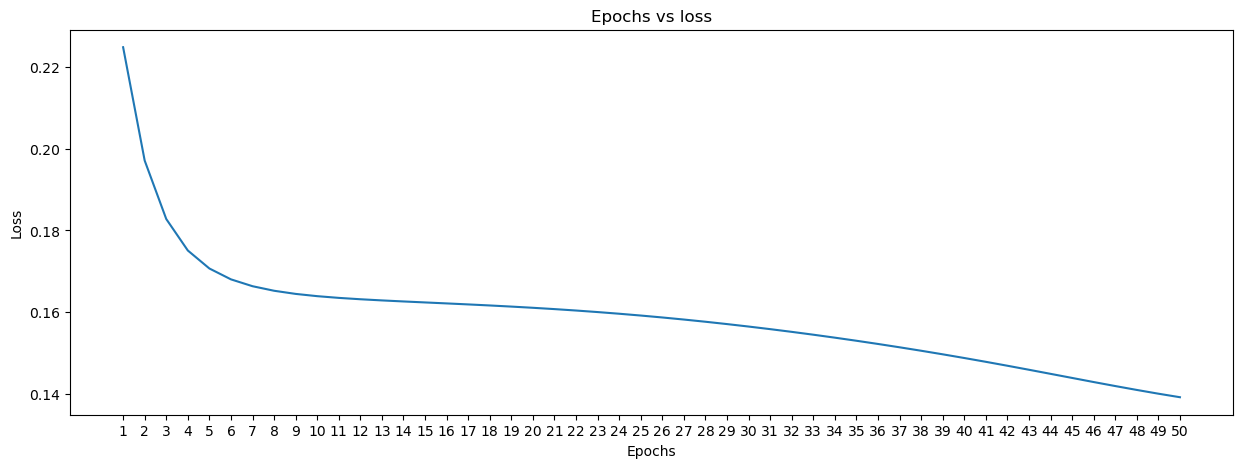

In [150]:
   plt.figure(figsize = (15, 5))
plt.plot(epochs, loss_data)
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.title("Epochs vs loss")
plt.show()


In [151]:
accuracy_data = history.history["accuracy"]

In [152]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [153]:
loss_data = history.history["loss"]

In [154]:
loss_data

[0.22490167617797852,
 0.1971273273229599,
 0.18281137943267822,
 0.17509688436985016,
 0.17068862915039062,
 0.16802698373794556,
 0.1663486212491989,
 0.16523465514183044,
 0.16446398198604584,
 0.16390980780124664,
 0.16348937153816223,
 0.16315411031246185,
 0.16286960244178772,
 0.16261352598667145,
 0.16237249970436096,
 0.16213370859622955,
 0.16188852488994598,
 0.16163180768489838,
 0.1613568216562271,
 0.16106124222278595,
 0.16074027121067047,
 0.16039159893989563,
 0.16001412272453308,
 0.1596052050590515,
 0.1591644138097763,
 0.1586899757385254,
 0.15818195044994354,
 0.15764285624027252,
 0.15706990659236908,
 0.15646612644195557,
 0.15583115816116333,
 0.15516573190689087,
 0.15446984767913818,
 0.15374232828617096,
 0.15298603475093842,
 0.15220050513744354,
 0.15138418972492218,
 0.15053912997245789,
 0.1496639996767044,
 0.14875982701778412,
 0.14782515168190002,
 0.14686410129070282,
 0.14587944746017456,
 0.14487916231155396,
 0.1438761204481125,
 0.142870545387268

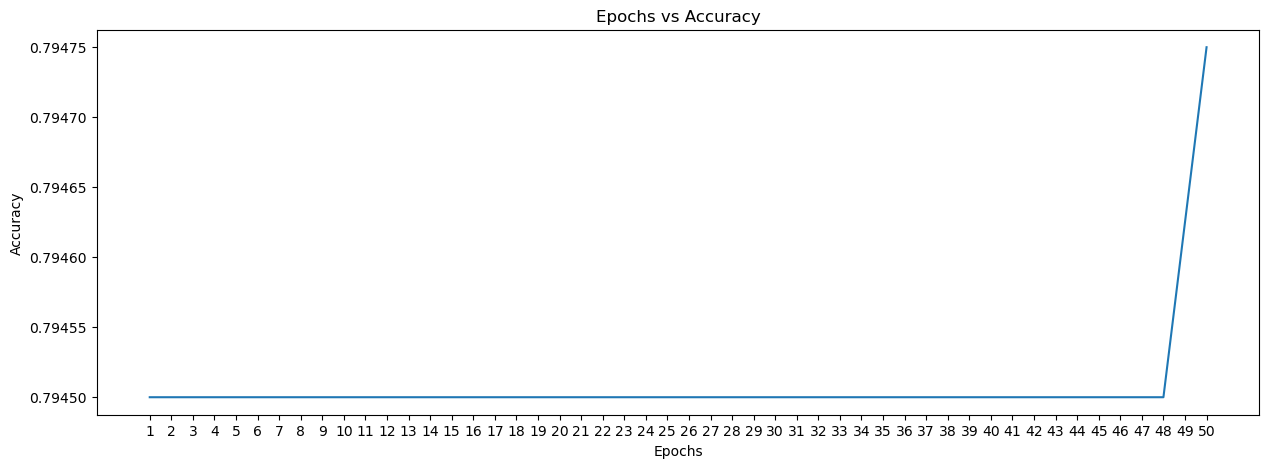

In [155]:
 plt.figure(figsize = (15, 5))
plt.plot(epochs, accuracy_data)
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.show()


Evaluation

In [156]:
#prediction

In [157]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [158]:
len(x_test)/32

62.5

In [159]:
y_pred = nn_model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [160]:
y_pred

array([[0.2071507 ],
       [0.14229022],
       [0.29299527],
       ...,
       [0.3592625 ],
       [0.09579769],
       [0.2480143 ]], dtype=float32)

In [161]:
y_pred = y_pred > 0.5

In [162]:
y_pred = y_pred.astype("int")

In [163]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [164]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [165]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [166]:
print("Test accuracy : : ", accuracy_score(y_test, y_pred)*100, "%")

Test accuracy : :  80.30000000000001 %


In [167]:
from mlxtend.plotting import plot_confusion_matrix

In [168]:
cm_test = confusion_matrix(y_test, y_pred)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

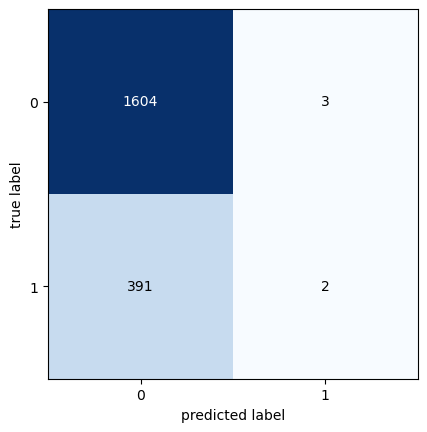

In [169]:
plot_confusion_matrix(cm_test)

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.40      0.01      0.01       393

    accuracy                           0.80      2000
   macro avg       0.60      0.50      0.45      2000
weighted avg       0.72      0.80      0.72      2000



Real Time prediction

In [171]:
data = list(x.iloc[10,:])

In [172]:
data = np.array([data])

In [173]:
data

array([[5.2800000e+02, 3.1000000e+01, 6.0000000e+00, 1.0201672e+05,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.0181120e+04,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00]])

In [174]:
data = sc.transform(data)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [175]:
nn_model.predict(data) > 0.5

1/1 [==============================] - 0s 55ms/step


array([[False]])

Save the model

In [176]:
 nn_model.save(" churn_prediction.h5")

Save the Scaler object

In [177]:
import joblib

In [178]:
joblib.dump(sc, "churn_sc.pkl")

['churn_sc.pkl']